Import the neccessary libraries

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

Data Loading

In [138]:
try:
    df = pd.read_csv('meta.csv')
    print("Data loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head().to_string())
except FileNotFoundError:
    print("Error: The file 'meta.csv' was not found. Please make sure it is in the same directory as the script.")
    exit()

Data loaded successfully!

First 5 rows of the dataset:
         Date       Open       High        Low      Close  Adj Close     Volume
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000  573576400
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999  168192700
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000  101786600
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   73600000
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   50237200


Data preprocessing and Feature Engineering

In [139]:
print(df.info())

# Check for missing values
df_missing = df.isnull().sum()
print(df_missing)

# Check for duplicates
df_duplicates = df.duplicated().sum()
print(df_duplicates)

# Rename the column for clarity and consistency
df.rename(columns={
    "Date":"date",
    "Open":"open",
    "High":"high",
    "Low":"low",
    "Close":"close",
    "Adj Close":"adj_close",
    "Volume":"volume"
},inplace=True)

# Display the first first row and information
print(df.head().to_string())
print(df.info())

# We will create a new feature called "average_price" which is the "open", "high" and "low" prices
# This new feature might have a strong relationship with the "close" price
df["average_price"] = (df["open"] + df["high"] + df["low"]) / 3

# We need to select the columns that will be our features (X) and our target (y)
# The target variable is what we want to predict, which is "close" price
# The features are the input variables the model will use to make predictions
features = ["open","high","low","volume","average_price"]
target = "close"
X = df[features]
y = df[target]

print("Shape of features (X):",X.shape)
print("Shape of target (y):",y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2906 non-null   object 
 1   Open       2906 non-null   float64
 2   High       2906 non-null   float64
 3   Low        2906 non-null   float64
 4   Close      2906 non-null   float64
 5   Adj Close  2906 non-null   float64
 6   Volume     2906 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.1+ KB
None
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
         date       open       high        low      close  adj_close     volume
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000  573576400
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999  168192700
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000  101786600
3  2012-05-23  31.370001 

Data Splitting

In [140]:
# It's cruical to split the data into a training set and testing set
# The model will learn from the training data, and we will evaluate its performance on the unseen testing data
# This prevents the model from simply memorizing the training data
# We'll use 80% of the data for training and 20% for testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Number of sample in the training set:",len(X_train))
print("Number of samples in testing set:",len(X_test))

Number of sample in the training set: 2324
Number of samples in testing set: 582


Model Training

In [141]:
# Here, we initialize our Linear Regression model and train it using training data
# The "fit()" method is where the model learns the relationship between the features and the target
print("Training the Linear Regression Model")
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training complete!")

Training the Linear Regression Model
Model training complete!


Model Evaluation

In [142]:
# After training, we use the model to make predictions on the test set
# Then, we evaluate the predictions by comparing them to the actual values in the test set
# Mean squared Error (MSE) measures the average squared difference between predicted and actual values.
# R-squared measured how well the model's predictions fit the actual data; a value closer to 1.0 is better
print("Evaluating Model")
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Evaluating Model
Mean squared Error (MSE): 1.54
R-squared: 1.00


Visualization

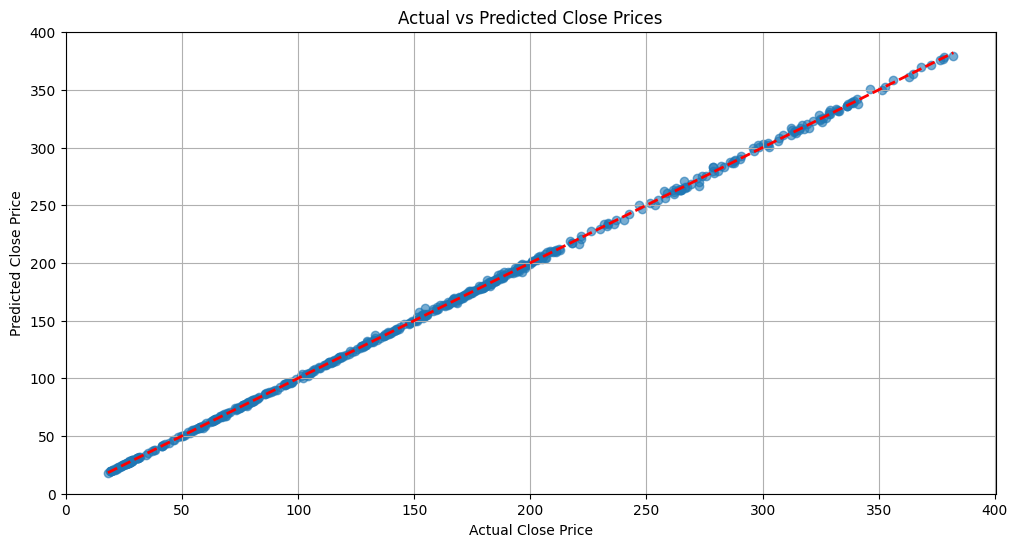

Plotting results. A perfect model would show all the points on the dashed line


In [143]:
# Visualizing the predictions is an excellent way to understand the model's performance inituitively
# We'll plot the actual test prices and the model's predicted prices
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid(True)
plt.show()

print("Plotting results. A perfect model would show all the points on the dashed line")

Making a New Prediction

In [144]:
# Let's use the trained model to make a prediction on a new,unseen data point
# This is how yo would use the model in a real-world application
# Note: The values here are hypothetical for demonstration
new_data = np.array([[320.0, 325.0, 318.0, 15000000, 321.0]])
predicted_price = model.predict(new_data)
print(f"\nExample prediction for a new data point:")
print(f"Features: Open=320, High=325, Low=318, Volume=15M, Avg=321")
print(f"Predicted Close Price: ${predicted_price[0]:.2f}")


Example prediction for a new data point:
Features: Open=320, High=325, Low=318, Volume=15M, Avg=321
Predicted Close Price: $322.41


c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
